# Data 620 Assignment: “hello, graph world”

Jithendra Seneviratne, Sheryl Piechocki 

June 6, 2020

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

### NetworkX Inbuild Krackhardt Graph

This is the inbuilt Krackhardt graph in NetworkX. We'll try to replicate it using random names.

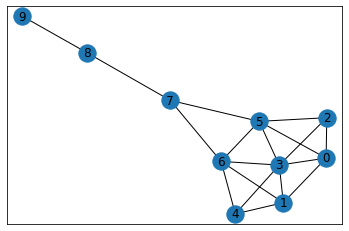

In [2]:
K = nx.krackhardt_kite_graph()
nx.draw_networkx(K)

### Manual Creation of Krackhardt Graph

The list of indices were borrowed from the Krackhardt graph function in NetworkX

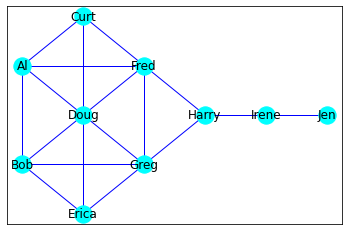

In [3]:
G=nx.Graph()

name_list = ['Al','Bob','Curt','Doug','Erica','Fred','Greg','Harry','Irene','Jen']

index_list = [[2,3,4,6],
              [1,4,5,7],
              [1,4,6],
              [1,2,3,5,6,7],
              [2,4,7],
              [1,3,4,7,8],
              [2,4,5,6,8],
              [6,7,9],
              [8,10],
              [9]]

# set the positions for the nodes
pos = {'Al': (0, 1),
       'Bob': (0, -1),
       'Curt': (1, 2),
       'Doug': (1, 0),
       'Erica': (1, -2),
       'Fred': (2, 1),
       'Greg': (2, -1),
       'Harry': (3, 0),
       'Irene': (4, 0),
       'Jen': (5, 0)}


network = []
for i in range(len(index_list)):
    for j in index_list[i]:
        network.append((name_list[i],name_list[j-1]))
        
G.add_edges_from(network)

nx.draw_networkx(G,
        pos=pos, 
        edge_color='blue',
        node_color='cyan')

### Real World Data

We'll use [EU email data](https://snap.stanford.edu/data/email-Eu-core.html) to explore NetworkX functionality further. Names of departments have been anonymized. Each tuple in the dataset represents a connection.

In [4]:
df = pd.read_csv('email-Eu-core.txt',
                 sep=',')

df['from_to'] = df['0 1'].apply(lambda x: x.split(' '))

In [5]:
df.head()

,0 1,from_to
0,2 3,"[2, 3]"
1,2 4,"[2, 4]"
2,5 6,"[5, 6]"
3,5 7,"[5, 7]"
4,8 9,"[8, 9]"


### Let's use only the top 200 rows in order to read the graph clearly.

In [6]:
C = nx.Graph()
C.add_edges_from(df['from_to'][:200])

In [7]:
list(C.edges())[:10]

[('2', '3'),
 ('2', '4'),
 ('2', '192'),
 ('3', '4'),
 ('4', '62'),
 ('5', '6'),
 ('5', '7'),
 ('6', '134'),
 ('8', '9'),
 ('10', '11')]

### Plot first 200 connections

This is not the complete graph. We're showing a subset for the purpose of a clear visualization

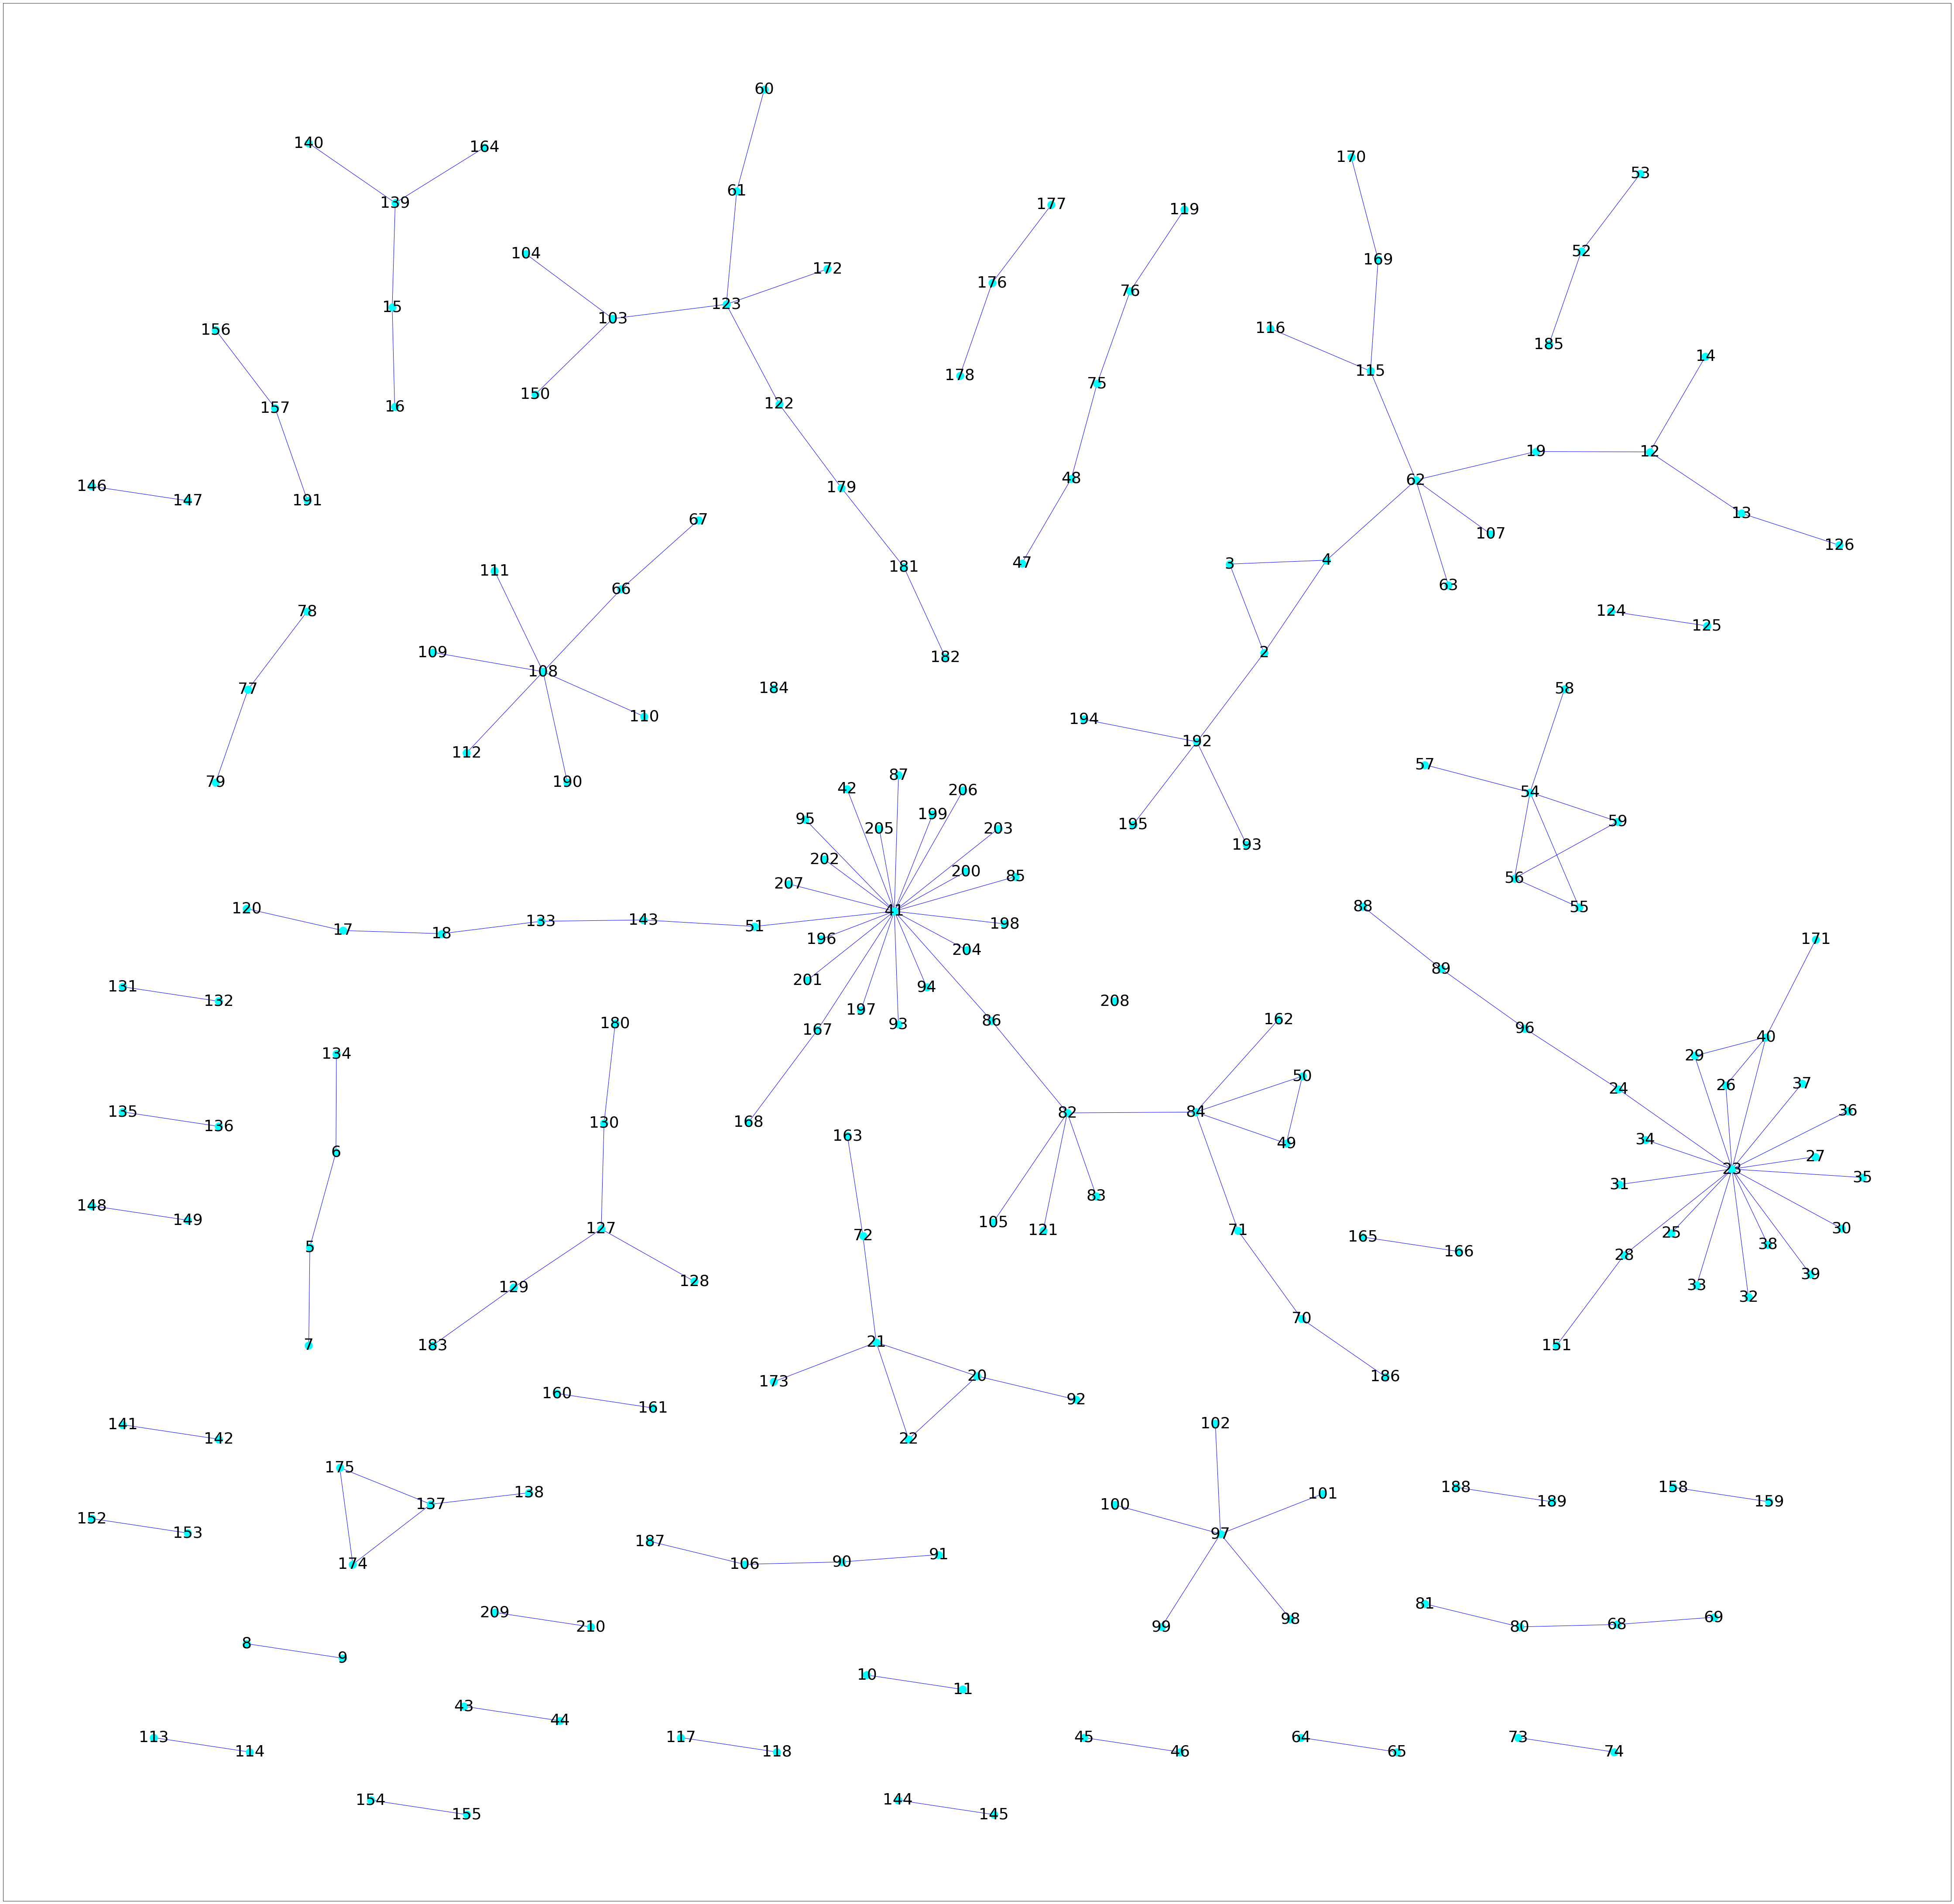

In [8]:
plt.figure(figsize=(80,80)) 
nx.draw_networkx(C,
         pos=nx.nx_pydot.graphviz_layout(C),
         edge_color='blue',
         node_color='cyan',
         font_size=36)
plt.draw()